# Conformally mapped body

In [1]:
using PotentialFlow

INFO: Precompiling module PotentialFlow.
fatal: error thrown and no exception handler available.
Base.MethodError(f=typeof(Core.Inference.convert)(), args=(Base.AssertionError, "invalid age range update"), world=0x0000000000000ac6)
rec_backtrace at /Users/osx/buildbot/slave/package_osx64/build/src/stackwalk.c:84
record_backtrace at /Users/osx/buildbot/slave/package_osx64/build/src/task.c:245 [inlined]
jl_throw at /Users/osx/buildbot/slave/package_osx64/build/src/task.c:564
jl_method_error_bare at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:1471
jl_method_error at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:1489
jl_lookup_generic_ at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:1903
jl_apply_generic at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:1923
Type at ./coreimg.jl:14
update_valid_age! at ./inference.jl:2353
add_backedge! at ./inference.jl:2366
abstract_call_gf_by_type at ./inference.jl:1421
jlcall_abstract_call_gf_by_type_659 at /usr/loc

MethodError(Core.Inference.convert, (AssertionError, "invalid age range update"), 0x0000000000000ac6)


LoadError: [91mFailed to precompile PotentialFlow to /Users/jeff/.julia/lib/v0.6/PotentialFlow.ji.[39m

## Set up

Create a body shape from a power series conformal map

In [2]:
a1 = 1; b1 = 0; ccoeff = Complex128[0.5(a1+b1),0,0.5(a1-b1)]
b = Bodies.ConformalBody(ccoeff)

LoadError: [91mUndefVarError: Bodies not defined[39m

In [9]:
n = 6; dθ = 2π/(2n)
θ = collect(0:dθ:2π-dθ)
w = (1+0.3cos.(n*θ)).*exp.(im*θ)
p = Bodies.Polygon(w)
b = Bodies.ConformalBody(p)

Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 12 vertices

  centroid at 0.0 + 0.0im
  angle 0.0


In [3]:
using Plots
clibrary(:colorbrewer)
default(grid = false)

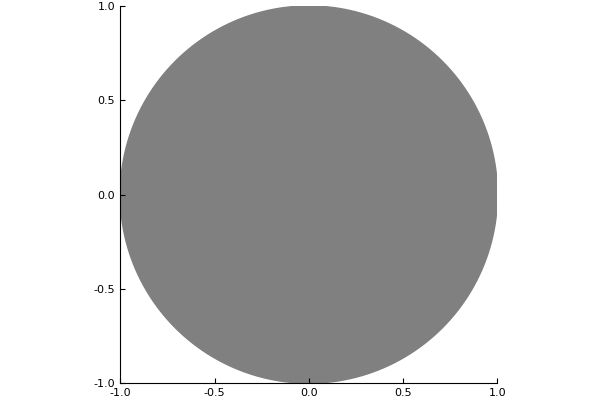

In [4]:
plot(b,fillcolor=:grey,linecolor=:grey)

In [112]:
plate = Plates.Plate(256,2.0,Complex128(0),π/4)

Plate: N = 256, L = 2.0, c = 0.0 + 0.0im, α = 45.0ᵒ
       LESP = 0.0, TESP = 0.0

In [29]:
p = Bodies.Polygon([-1.0,1.0,1.0,-1.0],[-1.0,-1.0,1.0,1.0])
b = Bodies.ConformalBody(p)

Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 4 vertices

  centroid at 0.0 + 0.0im
  angle 0.0


In [41]:
sys = (Vortex.Point(1.0im, π), Vortex.Blob(2.0im, -π, 0.1));
b = Bodies.ConformalBody(Complex128[1/4,0,1/4]);
Elements.conftransform(sys,b)

(0.0 + 0.0im, 0.0 + 0.375im)

In [44]:
dz, ddz = b.dm(1.0im)

(0.5 + 0.0im, 0.0 + 0.5im)

In [10]:
ċ = 0.0im
motion = RigidBodyMotion(ċ, 1.0);

In [11]:
Δt = 1.0;
b₊ = deepcopy(b)
advect!(b₊,b,motion,Δt)
b₊.α

1.0

In [46]:
vp1 = Vortex.Point.([1.1im,-2.3-1.0im,5.3im], 1.0)

3-element Array{PotentialFlow.Points.Point{Float64},1}:
 Vortex.Point(0.0 + 1.1im, 1.0) 
 Vortex.Point(-2.3 - 1.0im, 1.0)
 Vortex.Point(0.0 + 5.3im, 1.0) 

In [47]:
vp2 = Vortex.Point.([1.3,-3.1-1.0im,3.3im], -1.0)

3-element Array{PotentialFlow.Points.Point{Float64},1}:
 Vortex.Point(1.3 + 0.0im, -1.0) 
 Vortex.Point(-3.1 - 1.0im, -1.0)
 Vortex.Point(0.0 + 3.3im, -1.0) 

In [53]:
Bodies.enforce_no_flow_through!(b,motion,Vortex.Point[],0.0)

In [49]:
sys = (b,vp1,vp2)

(Body generated by: Power series map

  centroid at 0.0 + 0.0im
  angle 0.0
, PotentialFlow.Points.Point{Float64}[Vortex.Point(0.0 + 1.1im, 1.0), Vortex.Point(-2.3 - 1.0im, 1.0), Vortex.Point(0.0 + 5.3im, 1.0)], PotentialFlow.Points.Point{Float64}[Vortex.Point(1.3 + 0.0im, -1.0), Vortex.Point(-3.1 - 1.0im, -1.0), Vortex.Point(0.0 + 3.3im, -1.0)])

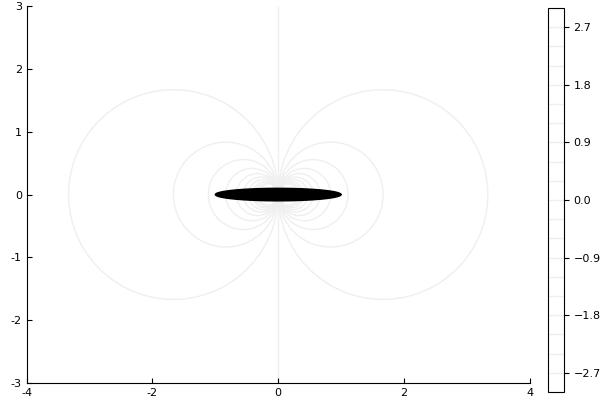

In [54]:
streamlines(-4:0.1:4, -3:0.1:3, b, clim = (-3, 3), levels = collect(-3:0.3:3), color = cgrad(["#efefef", "#efefef"]))
plot!(b)

Test the no-penetration condition at points on the body

In [8]:
ζ = exp(-im*π/4)
dz, ddz = b.dm(ζ)
sys = (b,vp1,vp2)
Bodies.normal(ζ,induce_velocity(ζ,sys,0)/conj(dz)-ċ,b)

4.882188713933115e-17

In [10]:
z = Complex128(-1.1)
streamfunction(z,b,vp,0.0)

(Vortex.Point(2.3 + 0.0im, 1.0), Vortex.Point(0.4347826086956522 + 0.0im, -1.0))


-0.1265897223663215

In [101]:
w = SchwarzChristoffel.naca4(0.1,0.4,0.12;len=2)
p = Bodies.Polygon(w);

In [17]:
ċ = 1.0
motion = RigidBodyMotion(ċ, 0.0);

In [18]:
Bodies.enforce_no_flow_through!(b,motion,(vp1,vp2),0.0)

In [21]:
ζ = exp(im*π/4)
dz, ddz = b.dm(ζ)
sys = (b,vp1,vp2)
real((induce_velocity(ζ,sys,0)/conj(dz)-ċ)*conj(ζ*dz)/abs(dz))

-4.864657457382513e-17

In [20]:
induce_velocity(ζ,sys,0)

0.28470959943201263 - 1.315380004696449im

In [12]:
streamfunction(z,b)

0.014405876191776143

In [13]:
z = Complex128[-1.1,2.0+2.0im,3.0-0.2im]
streamfunction(z,b)

3-element Array{Float64,1}:
 0.0144059 
 0.233941  
 0.00515583

In [45]:
plot_streamlines(sys;scalefactor=4.0)

8.0


LoadError: [91mUndefVarError: b not defined[39m

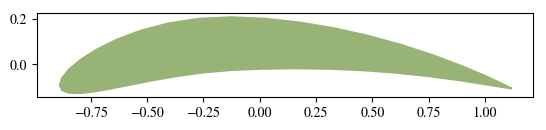

In [27]:
SchwarzChristoffel.plot(p)

In [15]:
b.α̇

0.0

In [84]:
sys = (b,vp1,vp2)

(Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 12 vertices

  centroid at 0.0 + 0.0im
  angle 0.0
, PotentialFlow.Points.Point{Float64}[Vortex.Point(0.0 + 1.1im, 1.0), Vortex.Point(-2.3 - 1.0im, 1.0), Vortex.Point(0.0 + 5.3im, 1.0)], PotentialFlow.Points.Point{Float64}[Vortex.Point(1.3 + 0.0im, -1.0), Vortex.Point(-3.1 - 1.0im, -1.0), Vortex.Point(0.0 + 3.3im, -1.0)])

# Testing advection

In [64]:
function compute_ẋ!(ẋ, x, t)
    body, ambient_sys = x
    motion = ẋ[1]
    motion.ċ, motion.c̈, motion.α̇ = motion.kin(t)
    
    Bodies.enforce_no_flow_through!(body, motion, ambient_sys, t)
    reset_velocity!(ẋ, x)
    self_induce_velocity!(ẋ, x, t)
    Bodies.transform_velocity!(ẋ, ẋ, x, body)
end

compute_ẋ! (generic function with 1 method)

### Elliptical bodies

In [10]:
a1 = 1; b1 = 0.1; ccoeff = Complex128[0.5(a1+b1),0,0.5(a1-b1)]
c = Complex128(0)
α = 0.0;
b = Bodies.ConformalBody(ccoeff,c,α)

Body generated by: Power series map

  centroid at 0.0 + 0.0im
  angle 0.0


### Flat plate

In [82]:
p = Bodies.Polygon([-0.5,0.5],[0,0]);
b = Bodies.ConformalBody(p)

Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 2 vertices

  centroid at 0.0 + 0.0im
  angle 0.0


### Basic polygon

In [169]:
p = Bodies.Polygon([-1.0,1.0,0.8,-0.6],[-0.5,-0.5,0.5,0.5]);
b = Bodies.ConformalBody(p)

Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 4 vertices

  centroid at 0.0 + 0.0im
  angle 0.0


### Star-shaped bodies

In [99]:
n = 6; dθ = 2π/(2n)
θ = collect(0:dθ:2π-dθ)
w = (1+0.3cos.(n*θ)).*exp.(im*θ)
p = Bodies.Polygon(w)
b = Bodies.ConformalBody(p)

Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 12 vertices

  centroid at 0.0 + 0.0im
  angle 0.0


### NACA airfoils

In [117]:
w = SchwarzChristoffel.naca4(0.1,0.4,0.12;len=1)
p = Bodies.Polygon(w);
b = Bodies.ConformalBody(p)

Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 39 vertices

  centroid at 0.0 + 0.0im
  angle 0.0


### Set the motion of the body

In [100]:
ċ = 0.0
α̇ = 1.0
Δt = 5e-3; # time step
motion = RigidBodyMotion(ċ, α̇);

### Set up initial vortices

In [128]:
init_ω_z = Vortex.Point.([-1.4], 1.0)

1-element Array{PotentialFlow.Points.Point{Float64},1}:
 Vortex.Point(-1.4 + 0.0im, 1.0)

In [129]:
track = Complex128[]
init_ω_ζ = inverse_conftransform(init_ω_z,b)
sys = (b, init_ω_ζ)
sys₊ = deepcopy(sys) # Used for storage during time-marching
ẋs = [(motion, allocate_velocity(init_ω_ζ)) for k = 1:4];
append!(track,Elements.position(init_ω_z))

1-element Array{Complex{Float64},1}:
 -1.4+0.0im

In [132]:
tf = 10
T = 0:Δt:tf-Δt

for t in T    
    TimeMarching.rk4!(sys₊, sys, t, Δt, compute_ẋ!, advect!, ẋs)
    
    sys₊, sys = sys, sys₊
    b_now, ambient_ω_ζ = sys
    append!(track,Elements.position(conftransform(ambient_ω_ζ,b_now)))
end
final_b, final_ω = sys;
ambient_ω_z = conftransform(final_ω,final_b)

1-element Array{PotentialFlow.Points.Point{Float64},1}:
 Vortex.Point(1.187965073940605 + 0.5445963531139862im, 1.0)

In [32]:
using Plots
clibrary(:colorbrewer)
default(grid = false)

### Plotting the instantaneous system

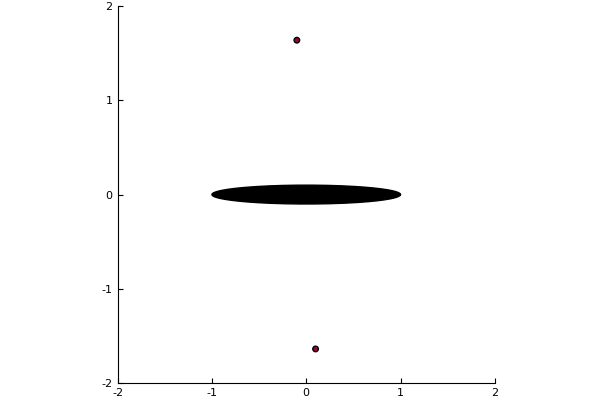

In [54]:
plot((b,ambient_ω_z),ratio=1,legend=:none,xlims = (-2,2), ylims = (-2,2))

### Plotting the pathlines of the vortex elements

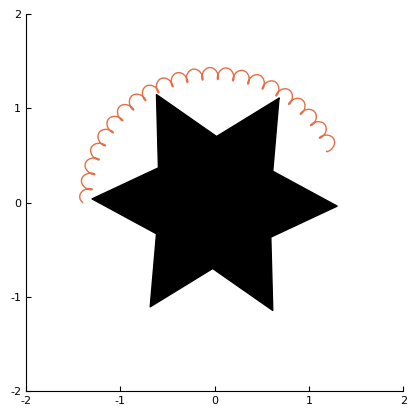

In [133]:
ps = plot(final_b,ratio=1,legend=:none,xlims = (-2,2), ylims = (-2,2),show=:true);
for i = 1:length(init_ω_z)
    plot!(ps,real.(track[i:length(init_ω_z):end]),imag.(track[i:length(init_ω_z):end]));
end

In [134]:
xrange = -2:0.1:2
yrange = -1:0.1:1

ζ = inverse_conftransform([x + im*y for y in yrange, x in xrange],b)
ψ = streamfunction(ζ, elements)
plot(xrange,yrange,ψ,series=:contour)
#streamlines(-2:0.1:2, -1:0.1:1, sys, ratio=1, clim = (-3, 3), levels = collect(-0.05:0.001:0.05), color = cgrad(["#efefef", "#efefef"]),linewidth=2)
plot!(b)

LoadError: [91mCheck solution[39m

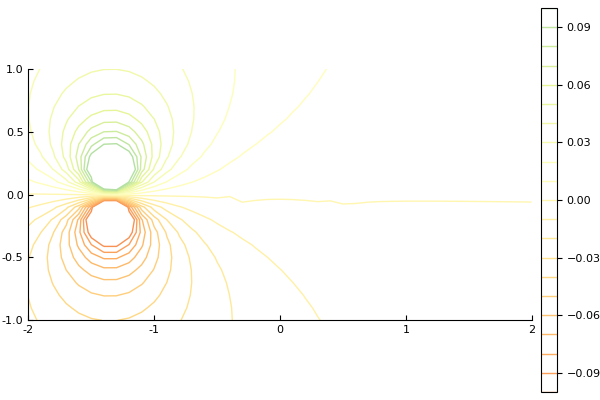

In [147]:
ψ = streamfunction(ζ, sys);
plot(xrange,yrange,ψ,seriestype=:contour,ratio=1,levels = collect(-0.1:0.01:0.1))

In [138]:
streamfunction(b.zs[10],sys)

-0.009433016478128359

In [151]:
rmax = 3.0
  eps = 0.00001;

  nth = 400;
  dth = 2π/nth;
  θ = linspace(0,2π,nth+1);
  dr = dth;
  r = [1+eps];
  while maximum(r) < rmax
    push!(r,r[end]+dr)
    dr = r[end]*dth;
  end
  
  ζ = r * exp.(im*θ');
Z = conftransform(ζ,b);

In [136]:
using BookExamples

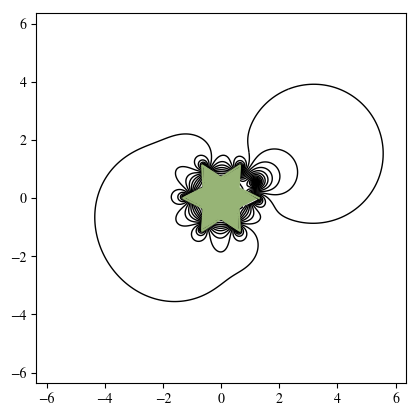

6.0


PyObject <matplotlib.contour.QuadContourSet object at 0x12d0bcf10>

In [137]:
plot_streamlines(sys;scalefactor=3.0)

In [153]:
ψ = streamfunction(ζ, sys);